<br>

<span style="font-size:2em;font-weight:bold">Auto Insurance Fraud Analysis</span>

In this exercise, we'll be creating a simple [Flask application](https://algoritma-autoinsurance.herokuapp.com/) using [fraud-detection-insurance data](https://www.kaggle.com/sanjeevkallepalli/fraud-detection-insurance) for autoinsurance fraud detection. Full data glossary can be accessed [here](https://github.com/t3981-h/AI-Fraud/blob/master/README.md).

This notebook contains guidances & tasks on the data processing for the application.

<span style="font-size:1.5em;font-weight:bold">Libraries & Setup</span>:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick

# Load & Pre-process data

Let's begin by reading our dataset in. The data will be using is `autoinsurance.csv` which located under `data/` directory:

In [2]:
insurance = pd.read_csv('data/autoinsurance.csv')
insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


A very common step on your exploratory process is to make sure that all your columns have stored in the right data types. In the following cell, use `dtypes` to acquire information of data type of each column:

In [3]:
## Your code here
insurance.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Notice that all categorical informations from the data were stored as `object` rather than `category`.

## Adjust Data Types

**Task 1**: Fill in the blank (`___`) part of the code below to cast all `object` to `category`:

In [4]:
catcol = insurance.select_dtypes('object').columns
insurance[catcol] = insurance[catcol].apply(lambda x: x.astype('category'))

In [5]:
insurance.dtypes

months_as_customer                int64
age                               int64
policy_number                     int64
policy_bind_date               category
policy_state                   category
policy_csl                     category
policy_deductable                 int64
policy_annual_premium           float64
umbrella_limit                    int64
insured_zip                       int64
insured_sex                    category
insured_education_level        category
insured_occupation             category
insured_hobbies                category
insured_relationship           category
capital-gains                     int64
capital-loss                      int64
incident_date                  category
incident_type                  category
collision_type                 category
incident_severity              category
authorities_contacted          category
incident_state                 category
incident_city                  category
incident_location              category


## Wrap as Function

Lastly, let's wrap the whole process above as a function named `load_data()`. This process is essential because in your Flask application later, you will need to define all your data processing as specific functions. 

**Task 3**: Fill in the blank (`___`) part with the same process you have done previously to complete the function.

In [6]:
def load_data():
    # Read data
    insurance = pd.read_csv('data/autoinsurance.csv')
    
    # Adjust dtypes
    catcol = insurance.select_dtypes('object').columns
    insurance[catcol] = insurance[catcol].apply(lambda x: x.astype('category'))
    
    return(insurance)

Congratulations, you have done the very first challenge of this capstone project!

If you take a look at the project directory, you will find two separate scripts; `app.py` and `helper.py`. `app.py` handles the routing and within `helper.py` you would define function to be called in `app`.

If you open up the `helper.py`, you will find all the functions needed to create the dashboard contents such as plots and data values. You may now copy the `load_data()` function definition above and overwrite the existing function on the script and save it.

In `app.py`, notice that there's a line of `data = load_data()`. that you've save your function in separate python file/script, you can import the function to another script as the following:

In [7]:
data = load_data()
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


<span style="font-size:2em;font-weight:bold">Data Wrangling & Visualization</span>

Now that you're data is ready, we're now ready to prepare the explanatory data in our dashboard!

Within `app.py` you will see the `index()` function will return a rendered templates along with some variables:
- `card_data`: quick summary including **Fraud Rate**, **Average Claim Amount** & **Fraud Loss**
- `plot_age`: **Fraud Reported by Age group** plot in **by Profile** tab
- `plot_premium`: **Months as Customer per Policy Annual Premium** plot in **by Profile** tab
- `plot_incident`: **Number of Fraud Reported per Day** plot in **by Report** tab
- `plot_report`: **Police Report Availability** plot in **by Report** tab

The values and plots above were resulted from all EDA techniques you have learned in the pervious workshops. Your next challenge is to recall how to use pandas subsetting method, aggregation tables and simple visualization!


# Extract Quick Summary

Let's acquire the needed information for the quick summary in `card_data`. There are 3 values you need to extract:
- **Fraud Rate**: The percentage of fraud reported (`Fraud_reported` = Y)  
- **Average Claim Amount**: The Average of total claim amount at this quarter (`total_claim_amount`)  
- **Total Fraud Loss**: Total of fraud loss at this quarter (`total_claim_amount`)

**Task 4**: Fill in the blank (`___`) part of the code below to create a proportion table of fraud and not fraud customer!

In [8]:
pd.crosstab(index= data.fraud_reported ,columns='count',normalize=True)*100

col_0,count
fraud_reported,
N,75.3
Y,24.7


We can extract the value from our table by using `.loc[]` subsetting method. 

**Task 5**: Fill in the blank (`___`) part to extract the information of fraud reported!

In [9]:
percent_fraud = float(pd.crosstab(index= data.fraud_reported ,columns='count',normalize=True).loc['Y']*100)

f'{percent_fraud}%'

'24.7%'

**Task 6**: Extract total fraud loss with similar method! Total fraud loss is total claim amount at reported fraud costumer

In [10]:
pd.crosstab(
    index = data['fraud_reported'],
    columns= 'Total',
    values= data['total_claim_amount'],
    aggfunc='sum'
)

col_0,Total
fraud_reported,
N,37867320
Y,14894620


In [11]:
fraud_loss = data.groupby('fraud_reported').sum()['total_claim_amount'].loc['Y']

f'US$ {fraud_loss:,}'

'US$ 14,894,620'

**Task 7**: The average total claim amount stored the average (`mean`) value of `total_claim_amount` variable. Extract the value on the cell code below!

In [12]:
data.groupby('fraud_reported').mean()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
fraud_reported,,,,,,,,,,,,,,,,,,,
N,202.600266,38.884462,550571.297477,1130.810093,1258.430000,1.023904e+06,500419.537849,25432.005312,-26554.581673,11.626826,1.808765,0.976096,1.455511,50288.605578,7179.229748,7018.884462,36090.491368,2005.075697,NaN
Y,208.080972,39.141700,533030.206478,1151.821862,1250.236275,1.336032e+06,503637.959514,24193.522267,-27522.672065,11.696356,1.931174,1.040486,1.582996,60302.105263,8208.340081,8560.121457,43533.643725,2005.186235,NaN


In [13]:
pd.crosstab(index= data['fraud_reported'],
            columns='Total Fraud Loss',
            values= data['total_claim_amount'],
            aggfunc='mean').round(2)

col_0,Total Fraud Loss
fraud_reported,
N,50288.61
Y,60302.11


<span style="font-size:1.5em;font-weight:bold">Update the application scripts!</span>

Lastly, follow these instructions to complete the next part of your application scripts:

- **On app.py:**
    - "Uncomment" the codes under `# generate value for cards` section then use the code in **Task 4** , **Task 5** & **Task 6** to complete the blank (`___`) part of the line

# Generate Plot

## by Profile

The "by Profile" tab contains explanatory analysis on the proportion of reported fraud by the policy holder profile. There are two plots you need to recreate for this tab; **Months as Customer per Policy Annual Premium** and **Fraud Reported by Age group**

### Fraud Reported by Age group

The Fraud Reported by Age group plot compares age group to see the frequencies of the fraud reported at each age group. 

#### Categorize age group

The `tenure_months` column indicates the total amount of months that the customer has been with the company by the end of the quarter. Your next task is to create a new column named `tenure_group` which categorize the tenure months by the following conditions:
- **19 - 24**: customer with age 19 years old up until 24 years old
- **24 - 30**: customer with age 24 years old up until 30 years old
- **and so on**

**Task 2**: Fill in the blank (`___`) part to create the `age_group` column!

In [14]:
# Tenure Months to grouping categories
def age_grouping(data):
    if(data.age <= 24):
        return '19 - 24'
    elif(data.age > 23 and data.age <= 30) : 
        return '24 - 30'
    elif(data.age > 30 and data.age <= 35) : 
        return '31 - 35'
    elif(data.age > 35 and data.age <= 40) : 
        return '36 - 40'
    elif(data.age > 40 and data.age <= 45) : 
        return '41 - 45'
    elif(data.age > 45 and data.age <= 50) : 
        return '46 - 50'
    elif(data.age > 50 and data.age <= 55) : 
        return '51 - 55'
    elif(data.age > 55 and data.age <= 59) : 
        return '56 - 59'
    else : 
        return '60+'

data['age_group'] = data.apply(age_grouping,axis = 1)

# Adjust category order
age_group_order = ['19 - 23','24 - 30','31 - 35','36 - 40','41 - 45','46 - 50','51 - 55','56 - 59']
data['age_group'] = pd.Categorical(data['age_group'], categories = age_group_order, ordered=True)

**Task 8**:  
Use `pd.crosstab()` to get the frequency proportion, then recall how to use `.plot(kind = 'barh')` to create a horizontal bar plot. Before you using crosstab to get the only fraud reported data, you need to subset the data first and save it at `fraud_data`. 

In [15]:
fraud_data = data[data['fraud_reported'] == 'Y']
age_profile = pd.crosstab(index=fraud_data['age_group'],columns='count')

You can also enhance the visualization such as adjusting the color by add the color parameter to your plot function call `.plot(kind = 'bar',color=['#c34454'])`.

For now, **do not mind the plot's customization** as you can copy-and-paste the codes defined under the `plot_age()` function in `helper.py`.

Text(0, 0.5, '')

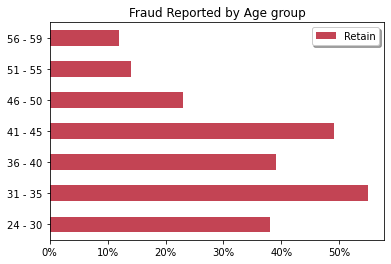

In [16]:
# Plot configuration
ax = age_profile.plot.barh(title = "Fraud Reported by Age group", legend= False, color = '#c34454')

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(['Retain', 'Churn'],fancybox=True,shadow=True)
plt.axes().get_yaxis().set_label_text('')
#plt.title('Phone Service Customer')

### Months as Customer per Policy Annual Premium

We need a helper function to make the plot more beautiful. You can just run and then skip this cell.

In [17]:
def tocolor(data):
    if(data.fraud_reported == 'Y'):
        return '#53a4b1'
    else : 
        return '#c34454'
    
data.fcolor = data.apply(tocolor,axis=1)

**Task 9**:  
Using the same steps as what you did on "Months as Customer per Policy Annual Premium" plot, except this time the plot is a scatter plot that compare how long the policy holder as customer with how much their annual premium to see how those two variable relation with each other, and how is the characteristic of the fraud reported profile based on those 2 numeric variable.

For now, **do not mind the plot's customization** as you can copy-and-paste the codes defined under the `plot_premium()` function in `helper.py`.

Text(0, 0.5, 'Policy Annual Premium')

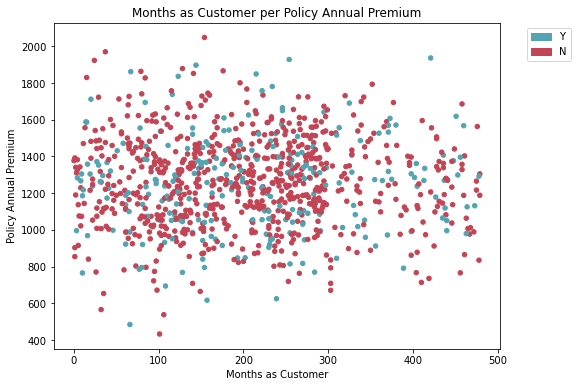

In [18]:
ax = data.plot.scatter(x= 'months_as_customer', 
                       y = 'policy_annual_premium', 
                       c=data.fcolor,title = "Months as Customer per Policy Annual Premium",
                       figsize=(8, 6))

lab_y = mpatches.Patch(color='#53a4b1', label='Y')
lab_n = mpatches.Patch(color='#c34454', label='N')
plt.legend(handles = [lab_y ,lab_n], bbox_to_anchor=(1.17, 1))
plt.xlabel("Months as Customer")
plt.ylabel("Policy Annual Premium")

## by Report

The "by Report" tab contains explanatory analysis on how is the relationship between incident report with the fraud cases. There are two plots you need to recreate for this tab; **Number of Report per Day** and **Police Report Availability**

### Number of Report per Day

**Task 10**:  
The Number of Report per Day plot visualize on how much the fraud cases happened at each day at this 1st quarter.

You can start by create the frequency table for the visualization. First we need a helper function to make it easier to wrangling the data. then you can create your frequency table, this time with `pivot_table()`

In [19]:
## Your code here

def tonum(data):
    if(data.fraud_reported == 'Y'):
        return 1
    else : 
        return 0
    
data['fnum'] = data.apply(tonum,axis=1)
timeseries = data.pivot_table(
    index='incident_date',
    values='fnum',
    aggfunc='count').ffill()

Text(0.5, 0, 'Incident Date')

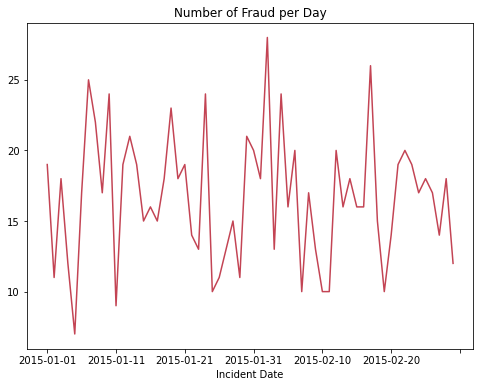

In [20]:
ax = timeseries.plot(legend=False, title = "Number of Fraud per Day",color='#c34454', figsize=(8, 6))

# Plot Configuration
plt.xlabel('Incident Date')

Again, **do not mind the plot's customization** as you can copy-and-paste the codes defined under the `plot_incident()` function in `helper.py`. 

### Police Report Availability

**Task 11**:  
The last plot you need to recreate is the Police Report Availability. This plot visualize how the relationship of Police Report Availability with the fraud report.

Since we'll separate the bars by the `fraud_report`, we will need to wrangling the data a bit to make the table we want for the visualisation.

In [21]:
## Your code here
df_fraud = data[data.fraud_reported == 'Y'].pivot_table(index='police_report_available',values='fraud_reported',aggfunc='count')

df_nfraud = data[data.fraud_reported == 'N'].pivot_table(index='police_report_available',values='fraud_reported',aggfunc='count')

p_report = pd.concat([df_fraud,df_nfraud],axis=1)
p_report

,fraud_reported,fraud_reported
police_report_available,,
?,89,254
NO,86,257
YES,72,242


Once your data is ready, recall how to use `.plot(kind = 'bar')` to create a bar plot. You can add the `stacked` Parameter to stack of the barplot. 

Once again, **do not mind the plot's customization** as you can copy-and-paste the codes defined under the `plot_report()` function in `helper.py`. 

Text(0.5, 0, "police report available'")

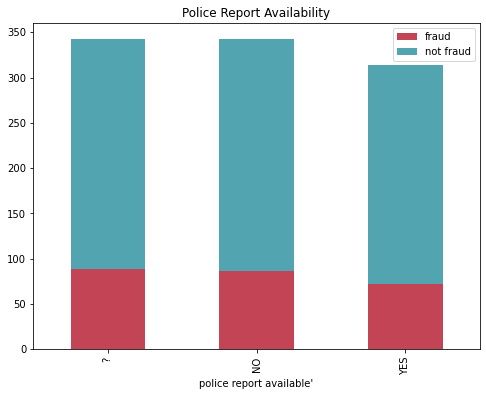

In [22]:
ax = p_report.plot.bar(stacked = True,color =['#c34454','#53a4b1'],title = "Police Report Availability", figsize=(8, 6))

# Plot Configuration
plt.legend(['fraud','not fraud'], bbox_to_anchor=(1, 1))
plt.xlabel("police report available'")

<span style="font-size:1.5em;font-weight:bold">Update the application scripts!</span>

Now that your plots are ready, it's time to move them to the dashboard!

- **On helper.py**:
    - Use the code on **Task 8-11** to complete the functions below:
        - Task 8 --> `plot_age()`
        - Task 9 --> `plot_premium()`
        - Task 10 --> `plot_incident()`
        - Task 11 --> `plot_report()`
        
- **On app.py:**
    - Now that all the functions are completed, you can call all functions from helper.py using the asterisk (\*) symbol: `from helper import *` 
    - "Uncomment" the codes under `# generate plot` section to generate the plots
    - Lastly, in `render_template()` at the end of `index()` in `app.py`, uncomment the remaining codes.

# Create-Your-Own Analysis

We have prepared a Create-Your-Own tab on the apps where you can play around with the data frame and come up with your own analysis perspective. Don't forget to do the following steps:

- Pass a variable onto the `render_template()` from `index()`
- Create a separate function on `helper.py` for data wrangling and preprocessing, either returning a dataframe, simple value, or a plot to keep the `app.py` as clean as possible and easy to debug at later times
- Edit the `index.html` to make sure it display your intended output on the page. You can copy-and-paste the skeleton from the other plots or values

<span style="font-size:1.5em;font-weight:bold;color:#05cf34">ANALISIS SAYA (Nopiliansyah) : Fraud Reported by "Incident Type and Incident City" </span>:

Text(0, 0.5, '')

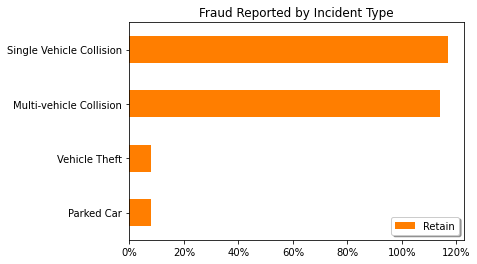

In [23]:
## Your code here
incident = pd.crosstab(index=fraud_data['incident_type'],columns='count').sort_values('count')

ax = incident.plot.barh(title = "Fraud Reported by Incident Type", legend= False, color = '#ff7e00')

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(['Retain', 'Churn'],fancybox=True,shadow=True)
plt.axes().get_yaxis().set_label_text('')

Text(0.5, 0, '')

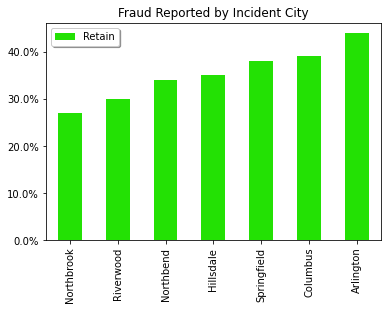

In [24]:
incident = pd.crosstab(index=fraud_data['incident_city'],columns='count').sort_values('count')

ax = incident.plot.bar(title = "Fraud Reported by Incident City", legend= False, color = '#23e104')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(['Retain', 'Churn'],fancybox=True,shadow=True)
plt.axes().get_xaxis().set_label_text('')